In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
df=pd.read_csv('df.csv')
df.head()

,Unnamed: 0,reviewer_name,time,review,share,like,Cleaned_Review,Processed_Review
0,0,Rishabh Ambadkar,a month ago,"Nice place, the staff is also helpful and supp...",Share,like,Nice place the staff is also helpful and suppo...,nice place staff also helpful supportive best ...
1,1,Aleksander Modrzejewski,a month ago,"Pros: very attentive service, polite and ready...",Share,Like,Pros very attentive service polite and ready t...,pro attentive service polite ready help good c...
2,2,Chirag Thakur,3 months ago,"Service was good, although the employees were ...",Share,Like,Service was good although the employees were m...,service good although employee focused service...
3,3,Mansi Mendon,a month ago,The Best outlet I have ever been too! Amazing ...,Share,Like,The Best outlet I have ever been too Amazing c...,best outlet ever amazing client servicing
4,4,ASHUTOSH VERMA,2 years ago,Never go this place they did not maintain prop...,Share,like,Never go this place they did not maintain prop...,never go place maintain proper cleaning please...


In [ ]:
# Apply sentiment analysis using TextBlob
sentiment_scores = df['Processed_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment based on polarity scores
df['Sentiment_Score'] = sentiment_scores
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the results
print(df[['review', 'Processed_Review', 'Sentiment_Score', 'Sentiment']])

                                                review  \
0    Nice place, the staff is also helpful and supp...   
1    Pros: very attentive service, polite and ready...   
2    Service was good, although the employees were ...   
3    The Best outlet I have ever been too! Amazing ...   
4    Never go this place they did not maintain prop...   
..                                                 ...   
166  What is the first point u note abt them. Its t...   
167  Easily accessible near Metro station of Saki N...   
168  A very prime location for a McDonalds’. Have b...   
169  Service Delivery and staff are excellent. The ...   
170  The experience of service was good but the pro...   

                                      Processed_Review  Sentiment_Score  \
0    nice place staff also helpful supportive best ...         0.580000   
1    pro attentive service polite ready help good c...         0.020000   
2    service good although employee focused service...         0.700000   
3  

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

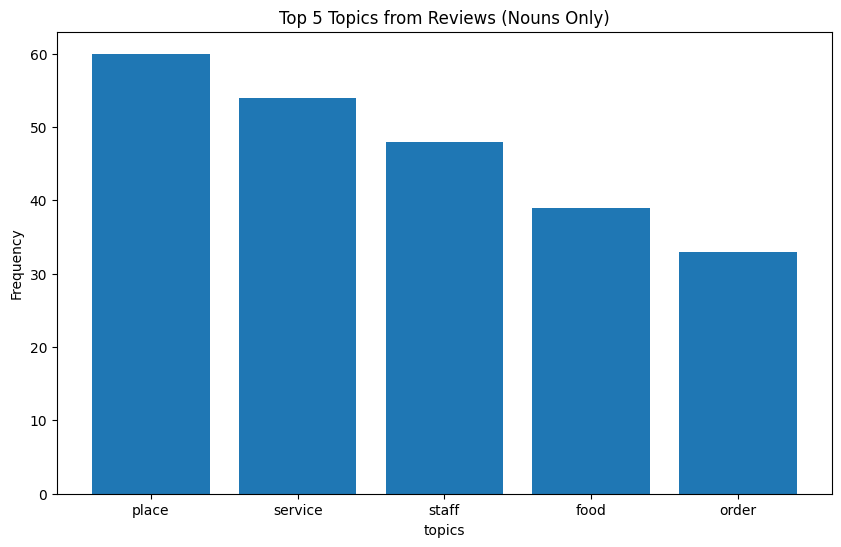

In [ ]:
import pandas as pd
from collections import Counter
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import matplotlib.pyplot as plt



# Define stopwords and POS tags for nouns
stop_words = set(stopwords.words('english'))
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']

# Function to extract nouns excluding stopwords
def extract_nouns(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    nouns = [word for word, tag in tagged_tokens if tag in noun_tags and word.lower() not in stop_words]
    return nouns

# Concatenate all processed reviews into a single text
all_reviews_text = ' '.join(df['Processed_Review'])

# Extract nouns from the text
all_nouns = extract_nouns(all_reviews_text)

# Count the frequencies of nouns
noun_counts = Counter(all_nouns)

# Extract the top 5 most frequent nouns as topics
top_nouns = noun_counts.most_common(5)
top_nouns = dict(noun_counts.most_common(5))

# Print the top nouns
# print("Top 5 Topics (Nouns Only):")
# for noun, count in top_nouns:
#     print(f"{noun}: {count}")
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(top_nouns.keys(), top_nouns.values())
plt.xlabel('topics')
plt.ylabel('Frequency')
plt.title('Top 5 Topics from Reviews (Nouns Only)')
plt.show()


In [ ]:
df_sorted = df.sort_values(by='Sentiment_Score', ascending=False)

# Select top 10 positive and negative reviews
top_positive_reviews = df_sorted.head(10)
top_negative_reviews = df_sorted.tail(10)

# Print top 10 positive reviews
print("Top 10 Positive Reviews:")
for idx, row in top_positive_reviews.iterrows():
    print(row['review'])

# Print top 10 negative reviews
print("\nTop 10 Negative Reviews:")
for idx, row in top_negative_reviews.iterrows():
    print(row['review'])

Top 10 Positive Reviews:
The Burgers are tasty and Delicious I like it  👌 😋 …
McD is the oldest and best burger maker in town.
One of the best place to hangout with friends and family. #PhotoLeneWala
Excellent staff service. 🤍 …
Staff is excellent an food is also excellent
Good food and cappuccino is awesome and also value for money
Quite good experience to visit this store meal was awesome 👌 …
Best place to have a burger and coffee... Loved it...
Credit of the pics, goes to google because I missed to capture.
It was a great experience had premium beg meal. Would recommend to couples......❤️
Food is delicious and very nice environment 💙 …

Top 10 Negative Reviews:
The staff was very cautious and I had my cousin brother with me who was feeling uncomfortable by the constant disturbance from them asking every 5mins if we're done.
Placed the order....yet again order delivered over 15 mins later because I asked for a manager and gave him my ticket, if not it would be sitting there getting c

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


data = {
    'topic': ["food", "place", "service", "staff", "order"],
    'sentiment': ["positive", "neutral", "negative"]  # Assuming sentiment labels are already present in the dataset
}

df = pd.DataFrame(data)

# Group by topic and sentiment, then calculate the count of reviews
sentiment_counts = df.groupby(['topic', 'sentiment']).size().unstack(fill_value=0)

# Plot stacked bar chart
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis by Top 5 Topics')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from nltk import word_tokenize
from collections import defaultdict
import matplotlib.pyplot as plt

topic= ["food", "place", "service", "staff", "order"]



# Load NRC Emotion Lexicon
nrc_lexicon = defaultdict(set)
with open("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", "r", encoding="utf-8") as file:
    for line in file:
        word, emotion, value = line.strip().split("\t")
        if int(value) == 1:
            nrc_lexicon[word].add(emotion)

# Function to get emotions from text
def get_emotions(text):
    emotions = defaultdict(int)
    tokens = word_tokenize(text.lower())
    for token in tokens:
        if token in nrc_lexicon:
            for emotion in nrc_lexicon[token]:
                emotions[emotion] += 1
    return dict(emotions)

# Apply emotion analysis to each review
df['emotions'] = df['Processed_Review'].apply(get_emotions)

# Summarize emotions for each topic
topic_emotions = {topic: defaultdict(int) for topic in topic.unique()}
for _, row in df.iterrows():
    topic = row['topic']
    for emotion, count in row['emotions'].items():
        topic_emotions[topic][emotion] += count

# Plot bar charts for each topic
for topic, emotions in topic_emotions.items():
    plt.figure(figsize=(8, 5))
    plt.bar(emotions.keys(), emotions.values(), color='skyblue')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.title(f'Emotion Analysis for {topic}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'